In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, warnings, time

from datetime import datetime, timedelta

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('../Edu/code/data/27_problem1.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
0,60.0,1.069141,0.043786,0.309867,1.316694,-0.462394,-0.857888,0.207904,-0.191270,0.056398,0.041567,-0.507358,-0.108666,-0.473257,0.452046,1.005675,0.185441,-0.439976,89.40,0
1,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,0.00,1
2,426.0,-1.932055,1.724618,1.288229,-0.396998,-0.140202,2.470521,-1.865298,-5.186855,0.794764,0.155379,0.034517,0.906738,-0.027172,-0.404303,-0.473949,0.274034,-0.222340,16.19,0
3,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,529.00,1
4,674.0,-0.719065,0.638954,0.686335,-0.023240,2.317890,3.871978,-0.312797,1.089780,-0.596925,-0.006142,-0.242883,-0.384491,0.109079,0.187565,1.823472,0.274346,-0.697730,22.00,0


# 머신러닝

## 1 데이터 전처리

### 1-1

데이터의 특징 파악 (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1193 non-null   float64
 1   V1      1193 non-null   float64
 2   V2      1193 non-null   float64
 3   V3      1193 non-null   float64
 4   V4      1193 non-null   float64
 5   V5      1193 non-null   float64
 6   V6      1193 non-null   float64
 7   V7      1193 non-null   float64
 8   V8      1193 non-null   float64
 9   V9      1193 non-null   float64
 10  V10     1193 non-null   float64
 11  V11     1193 non-null   float64
 12  V12     1193 non-null   float64
 13  V13     1193 non-null   float64
 14  V14     1193 non-null   float64
 15  V15     1193 non-null   float64
 16  V16     1193 non-null   float64
 17  V17     1193 non-null   float64
 18  Amount  1193 non-null   float64
 19  Class   1193 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 186.5 KB


In [4]:
df.Class.unique()

array([0, 1])

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
count,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.00000,1193.000000
mean,91514.485331,-0.755027,0.543730,-1.148224,0.777816,-0.409181,-0.283953,-0.852545,0.145026,-0.446390,-0.904275,0.656342,-1.014185,0.011973,-1.168346,0.019232,-0.629529,-1.070657,88.88570,0.167645
std,47896.081947,3.622262,2.663928,3.908787,2.345566,2.702077,1.507579,3.396565,2.471559,1.664075,2.902608,1.957200,2.996734,1.013383,3.230613,0.908008,2.269400,3.812768,220.14133,0.373707
min,60.000000,-30.552380,-33.644637,-31.103685,-4.294888,-22.105532,-10.886820,-37.060311,-37.353443,-11.126624,-23.228255,-2.651584,-17.228662,-2.800154,-18.493773,-4.498945,-14.129855,-25.162799,0.00000,0.000000
25%,50265.000000,-1.302600,-0.435358,-1.609339,-0.610310,-0.842184,-1.017863,-0.806043,-0.219328,-1.039740,-0.883807,-0.601391,-0.967306,-0.692559,-0.950226,-0.549590,-0.701499,-0.682272,3.54000,0.000000
50%,81797.000000,-0.302521,0.231973,-0.234204,0.327567,-0.073622,-0.379633,-0.084983,0.073036,-0.210455,-0.226471,0.283080,-0.014046,0.023014,-0.099055,0.046894,-0.055831,-0.152578,20.99000,0.000000
75%,136995.000000,1.249960,1.112040,0.811507,1.335332,0.684224,0.302350,0.464553,0.454794,0.452561,0.287274,1.212163,0.512121,0.699744,0.419194,0.660619,0.458139,0.368286,77.49000,0.000000
max,172676.000000,2.320621,19.167239,3.324665,12.114672,15.275762,6.268481,8.123589,20.007208,5.916809,7.135948,11.669205,3.106650,3.068228,3.886382,2.869424,3.139656,6.739384,3335.73000,1.000000


총 1193개의 데이터로 이루어졌음을 확인했다. 모든 변수는 수치형 변수이고,  
Class는 0과 1로 이루어진 이진 변수이다. 또한 결측값이 존재하지 않는다.  
Class 변수 외 모두 연속형 변수로 확인된다.

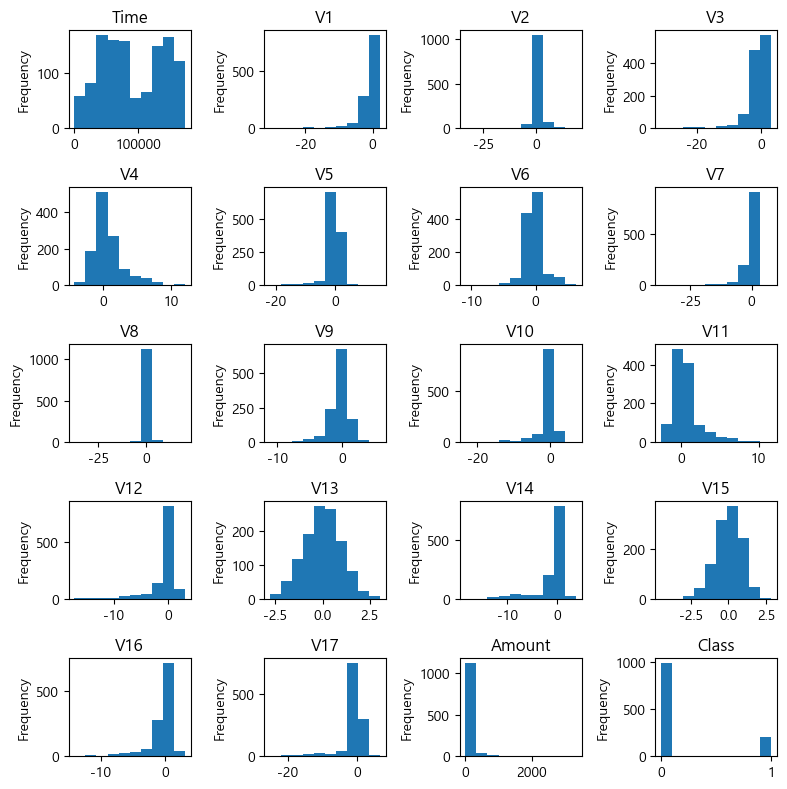

In [6]:
plt.figure(figsize=(8, 8))
for idx, col in enumerate(df.columns):
    plt.subplot(5, 4, idx+1)
    df[col].plot(kind='hist')
    plt.title(col)

plt.tight_layout()
plt.show();

모든 변수의 히스토그램을 살펴본 결과, V1 ~ V17 컬럼은 대부분 0 근처에  
데이터가 분포하고 있다. Amount 또한 마찬가지이며 이진 변수인  
Class의 데이터 분포가 불균형한 것을 확인할 수 있다.

In [7]:
df.Class.value_counts() / len(df)

Class
0    0.832355
1    0.167645
Name: count, dtype: float64

Class 변수의 클래스 비율을 살펴보니 약 83:17 정도로 불균형하다.

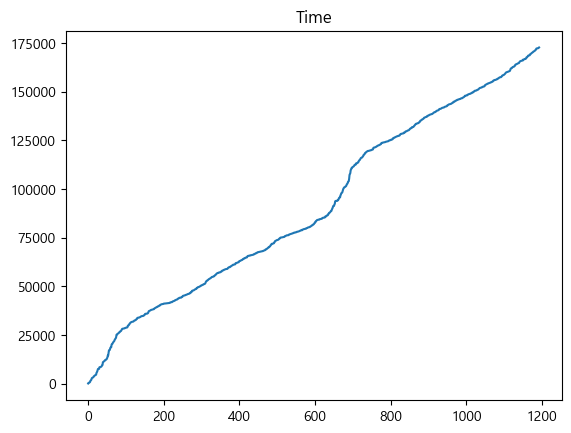

In [8]:
plt.title('Time')
df.Time.plot();

Time 변수는 누적된 시간을 나타내는 변수로 보인다.

In [9]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount
Class,,,,,,,,,,,,,,,,,,,
0,94258.217523,0.018917,-0.011237,-0.045308,0.044207,0.086018,-0.045132,0.009048,-0.014774,-0.032517,0.005167,0.038878,0.003587,0.023074,0.024501,0.017683,0.043565,0.035805,85.187613
1,77891.855000,-4.597659,3.299139,-6.624207,4.420185,-2.867841,-1.469696,-5.130353,0.938431,-2.501269,-5.419653,3.722054,-6.067424,-0.043141,-7.090834,0.026921,-3.971442,-6.564245,107.246700


Class별 변수들의 평균을 살펴보면 Class가 0인 경우 V1 ~ V17 또한  
평균이 0에 가깝고, Class 1의 경우에는 0에서 편차가 있는 편이다.  

Class 0인 경우에 Time의 평균이 크고, Amount 평균이 작았으며,  
Class 1인 경우에 TIme의 평균이 작고, Amount 평균이 컸다.

히스토그램으로 살펴본 V1 ~ V17 변수의 경우 0 부근에 분포가 많았기 때문에,  
Class 0으로 분류된 데이터가 많았을 것으로 보인다.

### 1-2

상관관계 시각화 및 필요한 전처리 설명

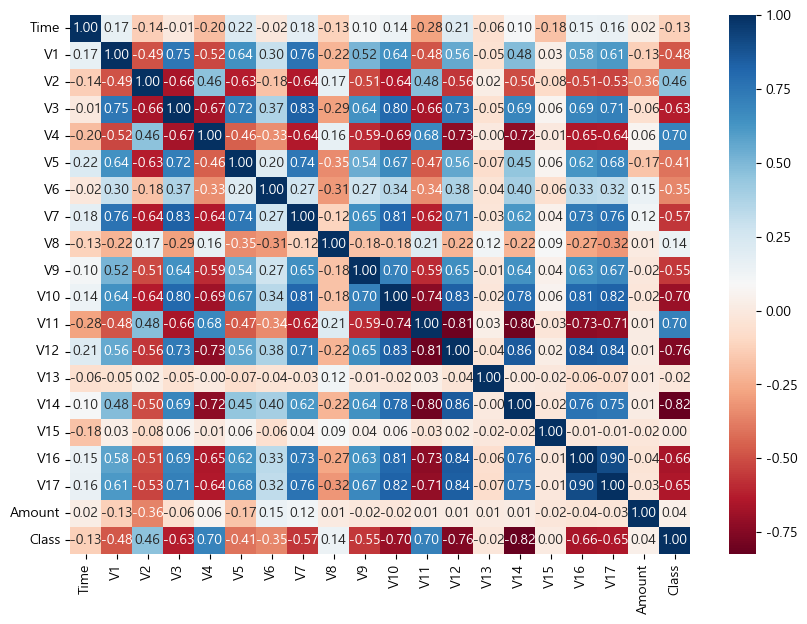

In [10]:
corr_df = df.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='RdBu');

전체적으로 상관관계가 높은 것을 확인할 수 있다.  
특히 Class 변수와 강한 상관관계를 보이는 변수로는  
V4, V10, V11, V12, V14, V16, V17 변수가 있다.  
또한 V 변수들 간에도 강한 상관관계를 보이고 있다.

그렇기 때문에 다중공선성의 문제가 발생할 수 있다.  
따라서 변수 중요도를 특정하여 그 이상인 변수만 선택을 한다던지,  
VIF를 확인하여 변수를 선택하는 처리가 가능하겠고,

PCA 등의 차원축소를 통해 변수를 축소시켜 다중공선성을  
제겋는 처리가 가능하겠다.

## 2 차원축소

### 2-1

차원축소 방법 2가지 이상을 비교하고 한 가지를 선택

PCA(주성분 분석) : 원데이터의 특징을 잘 설명해주는 성분을 추출하기 위해  
고차원 공간의 표본들을 선형 연관성이 없는 저차원 공간으로 변환하는 기법

MDS(다차원 척도법) : 개체들 사이의 유사성, 비유사성을 측정하여 2차원 또는  
3차원 공간 상에 점으로 표현하여 개체들 사이의 집단화를 시각적으로 표현하는 방법

이 두 가지 방법 중 속도적인 측면에서 유리한 주성분 분석을 선택한다.

### 2-2

선택한 방법을 수행하고, 선택한 이유 설명

In [11]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(
    df.iloc[:, :-1], df[['Class']],
    stratify=df[['Class']], random_state=2025
)

for i in range(2, 8):
    pca = PCA(n_components=i)
    pca.fit(train_x)
    if sum(pca.explained_variance_ratio_) >= 0.85:
        print(f'차원축소로 적당한 주성분 수 : {i}')
        print(f'{i}개 주성분의 누적 비율 : {sum(pca.explained_variance_ratio_)}')
        break

차원축소로 적당한 주성분 수 : 2
2개 주성분의 누적 비율 : 0.9999999474502296


두 개의 주성분만으로 데이터의 거의 전부를 설명 가능하다고 볼 수 있다.  
따라서 두 개의 주성분을 사용한다.

In [12]:
pca = PCA(n_components=2)

start = time.time()
pca_train_x = pca.fit_transform(train_x)
end = time.time()

print(f"PCA : {end-start:.4f} Sec")

PCA : 0.0022 Sec


In [13]:
mds = MDS(n_components=2)

start = time.time()
mds_train_x = pca.fit_transform(train_x)
end = time.time()

print(f"MDS : {end-start:.4f} Sec")

MDS : 0.0034 Sec


비교를 위해 PCA와 MDS 모두 같은 2차원으로 축소하고, 소요 시간을 확인해봤다.  
선택 이유와 같이 연산이 상대적으로 가벼운 PCA의 차원축소 속도가  
더 빠른 것을 확인했다. 따라서 다차원 척도법에 비해  
연산이 가벼운 PCA로 차원축소를 진행한다.  

In [14]:
pca_test_x = pca.transform(test_x)

## 3 오버 / 언더 샘플링

### 3-1

오버샘플링과 언더샘플링의 장단점을 비교하고 선택

언더샘플링은 다수 클래스의 데이터를 제거하여 소수의 클래스 데이터와  
비율을 같게 하는 샘플링으로, 모델 학습에 추정 데이터가 아닌  
실제 관측된 데이터만을 사용할 수 있다는 장점이 있다.  
그러나 데이터셋의 크기가 작아져 과소적합의 우려가 있고,  
보통은 오버샘플링보다 모델 성능에 불리하다.

오버샘플링은 소수의 클래스를 무작위로 복제하는 랜덤 오버샘플링이나,  
소수 클래스와 유사한 데이터를 생성하는 SMOTE 기법 등을 통해  
다수의 클래스와 비율을 같게 하는 샘플링이다.  
언더샘플링에 비해 모델 성능에 유리한 점이 장점이지만,  
랜덤 오버샘플링의 경우에는 과대적합의 우려가 있고,  
SMOTE 기법의 경우 데이터를 생성하기 때문에  
변수 특징 훼손의 우려가 있다.

하지만 일반적으로 모델 성능에 유리한 오버샘플링 기법을 선택한다.

### 3-2

분류분석 모델 구현 및 선택한 샘플링 기법 중 2가지 이상의  
알고리즘으로 모델을 비교하고 성능 측정

원데이터에 오버샘플링 중 SMOTE 기법을 적용하고,  
오버샘플링 된 데이터에 PCA를 적용한 데이터를  
분류분석 모델에 학습하고 성능을 측정한다.

분류분석 모델로는 랜덤 포레스트와  
로지스틱 회귀 분류기로 구현한다.

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

x = df.iloc[:, :-1]
y = df.iloc[:, -1]
smote = SMOTE(sampling_strategy=1)

smp_x, smp_y = smote.fit_resample(x, y)

train_x, test_x, train_y, test_y = train_test_split(
    smp_x, smp_y, stratify=smp_y, random_state=2025
)

pca = PCA(n_components=2)

pca_train_x = pca.fit_transform(train_x)
pca_test_x = pca.transform(test_x)

rf = RandomForestClassifier()
lr = LogisticRegression()

start = time.time()
rf.fit(pca_train_x, train_y)
end = time.time()

pred_start = time.time()
rf_score = rf.score(pca_test_x, test_y)
pred_end = time.time()

print(f'Random Forest 학습 시간 : {end-start:.4f} Sec')
print(f'Random Forest 추론 시간 : {pred_end-pred_start:.4f} Sec')
print(f'Random Forest 정확도    : {rf_score:.4f}\n\n')

start = time.time()
lr.fit(pca_train_x, train_y)
end = time.time()

pred_start = time.time()
lr_score = lr.score(pca_test_x, test_y)
pred_end = time.time()

print(f'Logistic Regression 학습 시간 : {end-start:.4f} Sec')
print(f'Logistic Regression 추론 시간 : {pred_end-pred_start:.4f} Sec')
print(f'Logistic Regression 정확도    : {lr_score:.4f}')

Random Forest 학습 시간 : 0.5292 Sec
Random Forest 추론 시간 : 0.0385 Sec
Random Forest 정확도    : 0.7726


Logistic Regression 학습 시간 : 0.0211 Sec
Logistic Regression 추론 시간 : 0.0051 Sec
Logistic Regression 정확도    : 0.5573


In [16]:
smp_y.value_counts()

Class
0    993
1    993
Name: count, dtype: int64

In [17]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((1489, 19), (497, 19), (1489,), (497,))

속도적인 측면에서는 로지스틱 회기 분류기가 좋아보이나,  
정확도 측면에서는 Random Forest가 약 17% 정도 더 높게 나왔다.

따라서 Random Forest 모델을 활용하는 것이 좋아보인다.

### 3-3

현재까지 전처리한 데이터를 통해 분류 모델 수행 후 결과 분석

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       249
           1       0.75      0.81      0.78       248

    accuracy                           0.77       497
   macro avg       0.77      0.77      0.77       497
weighted avg       0.77      0.77      0.77       497



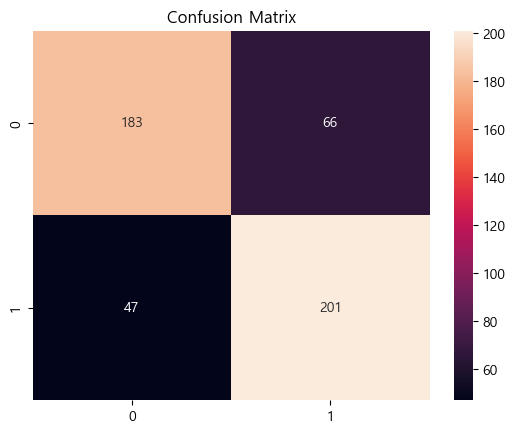

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

conf_matrix = confusion_matrix(test_y, rf.predict(pca_test_x))
reports = classification_report(test_y, rf.predict(pca_test_x))

plt.title('Confusion Matrix')
sns.heatmap(conf_matrix, annot=True, fmt='d');

print(reports)

test_y와 predict 값을 통해 혼동행렬과 분류 보고서를 살펴보면,  
정밀도, 재현율, F1-Score 모두 동일한 수치를 보이고 있다.  
혼동행렬을 살펴보면 거의 동일하게 정분류와 오분류된 것을 확인할 수 있다.  

이는 SMOTE로 오버샘플링한 데이터를 PCA로 차원을 축소하는  
과정에서 데이터의 특징을 설명해주는 성분이  
거의 유사하게 추출됐다고 해석할 수 있다.

즉, 오버샘플링이 PCA로 인해 모델 성능에 영향을 주지  
못했다고 볼 수 있으므로, 두 기법 중 하나를 선택하여 데이터를  
처리하는 것이 좋아보인다.  

## 4 이상탐지 모델

### 4-1

이상탐지 모델 2가지 이상을 기술하고 장단점 설명

**Isolation Forest** : 최댓값과 최솟값 사이의 값을 선택하여 이상값을 탐지하는  
트리 계열의 모델로, 데이터 스케일의 영향을 받지 않고, 수치로 된 순서형 변수를  
별도의 처리 없이 바로 활용 가능하다. 하지만 초매개변수 설정이  
다소 복잡한 편이고, 이상값인지 아닌지만 판단이 가능하므로 활용성이 떨어진다.

**DBSCAN** : 밀도를 기반으로 군집을 생성하는 알고리즘으로, 밀도가 낮은 부분을  
이상값으로 판단할 수 있다. 이상값을 -1로 판단하는 동시에 군집도 나누기 때문에  
군집 분석 또한 동시에 진행할 수 있다. 하지만 군집 수가 커질수록   
연산량 또한 많아지기 때문에 속도적인 측면을 잘 고려해야 하는 것이 단점이다. 

### 4-2

앞서 전처리한 데이터로 한가지 이상의 탐지 모델 구현 및  
3 에서 만든 모델과 비교

In [19]:
from sklearn.ensemble import IsolationForest

isol = IsolationForest()

isol_pred = isol.fit_predict(pca_test_x)
isol_pred

array([ 1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
       -1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
        1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1, -1,
        1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [20]:
result_df = test_y.to_frame()
pred = rf.predict(pca_test_x)
result_df['classifier'] = pred
result_df['isolation'] = isol_pred

In [21]:
result_df

,Class,classifier,isolation
1489,1,1,1
1652,1,1,1
24,0,1,-1
1639,1,1,1
518,0,0,1
...,...,...,...
729,0,0,1
847,0,0,1
1332,1,1,-1
1565,1,1,1


In [22]:
pd.crosstab(result_df.classifier, result_df.isolation).T

classifier,0,1
isolation,,
-1,40,45
1,190,222


In [23]:
pd.crosstab(result_df['Class'], result_df.isolation).T

Class,0,1
isolation,,
-1,42,43
1,207,205


이상탐지 모델은 분류 분석기가 1로 분류한 값을 더 많이  
이상값으로 분류했다. 하지만 실제 값을 살펴보면 비슷하지만  
Class 0인 데이터를 이상치로 분류한 케이스가 더 많다.

### 4-3

데이터분석가 관점에서 3의 모델과 4의 모델을 설명

In [24]:
pca_test_x = pd.DataFrame(pca_test_x)
pca_test_x['noise'] = isol_pred
pca_test_x['class'] = test_y
pca_test_x['pred'] = pred

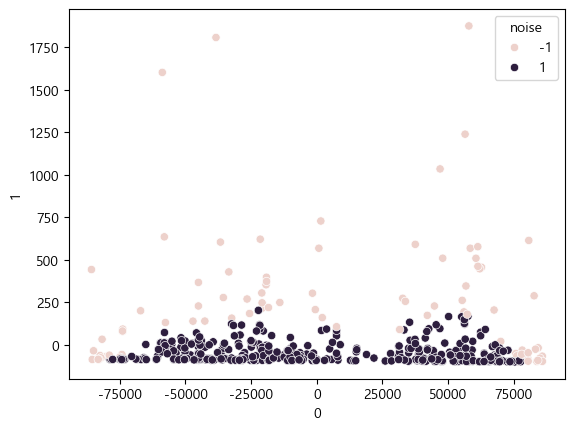

In [25]:
sns.scatterplot(data=pca_test_x, x=0, y=1, hue='noise');

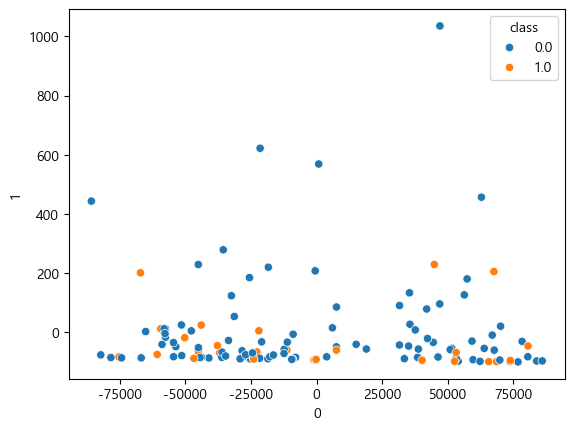

In [26]:
sns.scatterplot(data=pca_test_x, x=0, y=1, hue='class');

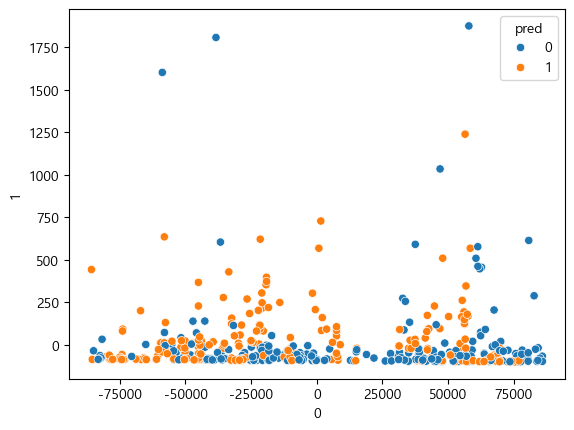

In [27]:
sns.scatterplot(data=pca_test_x, x=0, y=1, hue='pred');

In [31]:
pd.crosstab(result_df['Class'], result_df.classifier)

classifier,0,1
Class,,
0,183,66
1,47,201


데이터분석가의 관점에서 3번의 모델과 4번의 모델 모두 활용이 어려워 보인다.  

데이터 전처리 과정에서 오버샘플링을 통해 생성된 SMOTE 기법의 데이터가  
차원축소되며 설명되는 데이터의 특징이 비슷해졌고, 이 데이터로  
3의 모델을 학습했기 때문에 결론적으로는 랜덤 오버샘플링을  
적용하여 학습한 모델과 유사한 성능으로 보인다.  
수치적인 정확도는 74% 가량이지만 분류 결과를 보자면  
과대적합으로 보이기 때문이다. 이를 해결하기 위해 초매개변수 조정을  
해보는 것도 하나의 방법이 될 듯 하다.

4의 모델 또한 실제 사기로 판명된 데이터를 이상값으로 간주하지 못했다.  
그 이유로는 실제로 이상값같은 정상값을 분류하는 데 한계가 있고,  
또한 정상값같은 이상값을 분류하기에도 기술적인 한계가 있기 때문이다.  
이 현상 역시 차원축소를 적용하며 발생한 현상으로 보인다.

해당 문제의 경우 전체적인 정확도보다 Class 1인 데이터 분류를  
정확하게 해내어 사기를 탐지해야 되고, 따라서 정확도보다는  
특이도가 더 중요하다. 때문에 오버샘플링 또는 차원축소를  
적용하지 말고, 데이터 스케일링과 VIF를 통해 다중공선성을  
제거하는 방식으로 데이터 전처리하여 모델에 활용하는 것이 좋아보인다.

# 통계분석

## 1

2년 전 제품 생산량이 100000개, 1년 전 제품 생산량이 150000개,  
그후 기술 상승으로 제품 생산량이 250000개 되었을 때 연평균  
상승률의 대표값을 구하라 (소수점 아래 셋째 자리에서 반올림)

## 2

12건의 광고시간 측정 데이터에서 평균은 15.5초, 분산은 3.2초였다.  
이때 광고시간의 90% 신뢰구간을 구하시오.

## 3

강의 상류와 하류의 생물다양성 점수에 차이가 있는지 유의수준 0.1 하에 검정  
(단, 같은 강에서 상/하류는 서로 독립이 아니고, 정규성을 만족한다고 가정)

- (1) 가설수립
- (2) 검정통계량, 유의확률 구하기, 연구가설 채택여부 검정

In [28]:
data = pd.read_csv('../Edu/code/data/27_problem7.csv')
data.head()

,river,up,down
0,a,57.1,45.7
1,b,51.6,37.2
2,c,53.9,53.3
3,d,59.0,54.3
4,e,57.5,46.3


## 4

usercounts를 종속변수로 하는 데이터

- (1) 분위수 회귀분석을 사용해 회귀계수 구하기  
  (소수점 아래 셋째자리에서 반올림)
- (2) (1)의 회귀계수를 활용해 temperature 10.5, wind 8.2,  
  precipitation 3.5일 때 user_counts 예측 (반올림하여 소수 둘째 자리까지)

In [29]:
data = pd.read_csv('../Edu/code/data/27_problem8.csv')
data.head()

,temperature,wind,precipitation,user_counts
0,10.400000,4.600,0.844944,6368
1,5.666667,4.625,0.040860,5902
2,4.933333,4.725,0.008696,6226
3,3.400000,2.675,0.156989,5829
4,8.900000,3.950,7.988462,7589


## 5

지하철 호선과 월별 승객수 간 상관관계가 있는지 확인

- (1) 가설수립
- (2) Type III Anova를 사용하여 상관관계 검정

In [30]:
data = pd.read_csv('../Edu/code/data/27_problem9.csv')
data.head()

,line,month,total
0,1,1,1310
1,1,2,1300
2,1,3,1305
3,1,4,1200
4,1,5,1301


### 1-1 가설수립

#### 상호작용 효과 검정
- 귀무가설 H0 : 지하철 호선과 월별 승객수 간에는 상호작용이 없다.
- 대립가설 H1 : 지하철 호선과 월별 승객수 간에는 상호작용이 있다.

#### 주효과 검정
- 귀무가설 H0 : 지하철 호선에 따라 승객 수는 차이가 없다.
- 대립가설 H1 : 지하철 호선에 따라 승객 수는 차이가 있다.
- 귀무가설 H0 : 월에 따라 승객 수는 차이가 없다.
- 대립가설 H1 : 월에 따라 승객 수는 차이가 없다.

### 1-2

In [32]:
line1 = data[data.line == 1]
line2 = data[data.line == 2]
line3 = data[data.line == 3]

In [41]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [44]:
formula = 'total ~ C(month) * C(line)'

In [52]:
model = ols(formula, data).fit()

In [53]:
anova_table = anova_lm(model,typ=3)

In [54]:
anova_table

,sum_sq,df,F,PR(>F)
Intercept,3.466344e+06,1.0,33455.335657,4.849033e-55
C(month),3.942483e+04,11.0,34.591616,7.896179e-16
C(line),1.336630e+05,2.0,645.022520,6.417946e-29
C(month):C(line),9.696908e+04,22.0,42.540665,1.582232e-19
Residual,3.730000e+03,36.0,NaN,NaN


In [56]:
anova_table['PR(>F)'].round(4)

Intercept           0.0
C(month)            0.0
C(line)             0.0
C(month):C(line)    0.0
Residual            NaN
Name: PR(>F), dtype: float64

상호작용 및 주효과 모두 대립가설을 채택한다.  
따라서 사후분석을 진행한다.